In [25]:
#read CSV file
import pandas as pd
import re
#statistical data visualization
import seaborn as sb
import matplotlib.pyplot as plt


frame = pd.read_csv('input/pokemon.csv')
frame.head(20)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


In [24]:
# filter out bad names "Mega" 
frame.Name = frame.Name.apply(lambda x: re.sub(r'(.+)(Mega.+)', r'\2', x))
# filter out bad names "Primal" 
frame.Name = frame.Name.apply(lambda x: re.sub(r'(.+)(Primal.+)', r'\2', x))
# filter out "Hoopa"
frame.Name = frame.Name.apply(lambda x: re.sub(r'(.+)(Hoopa.+)',r'\2',x))

In [19]:
#remove all Mega pokémons and Primal pokémons
All = frame.loc[(frame['Name'].str.contains("Mega") == False) & (frame['Name'].str.contains("Primal") == False)]

In [28]:
#split up legendary and normal pokemons
poke = All.loc[(All.Legendary == False)]
pokeL = All.loc[(All.Legendary == True)]

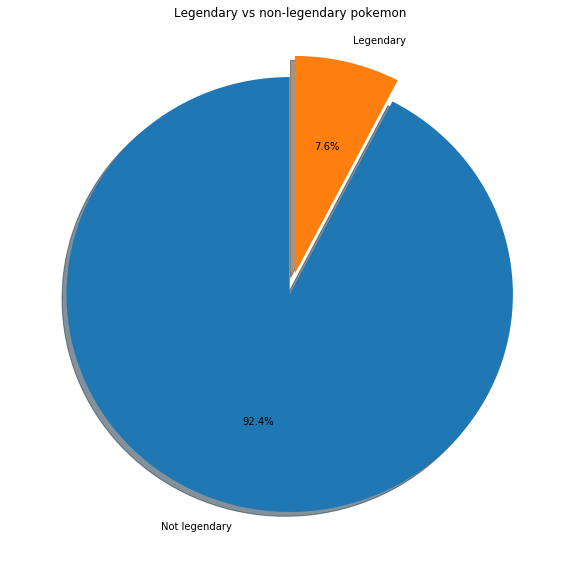

In [42]:
#Pie chart of legendary vs non-legendary pokemon
legendarySplit =[poke.Name.count(),pokeL.Name.count()]
legendPie = plt.pie(legendarySplit,labels=["Not legendary","Legendary"], 
                    autopct = '%1.1f%%', shadow = True, 
                    startangle=90,explode=(0,0.1))
plt.title("Legendary vs non-legendary pokemon",fontsize=12)
fig = plt.gcf()
fig.set_size_inches(10,10)